#          <center>   Fraudy </center>

![title](img/f2.png)

 
### Fraudy są: 
 
   #### - rzadkie
   #### - ukryte
   #### - zorganizowane 
   #### - zmieniające się w czasie
 

![title](img/f1.png)

### Przykłady: 
  - #### ubezpieczenia
  - #### bankowość
  - #### pranie pieniędzy
  - #### kradzież tożsamości
  - #### podatki

https://www.kaggle.com/mlg-ulb/creditcardfraud/ 

https://drive.google.com/open?id=109iyQMd7Y9iJ6py9Vy0Zf01ROMzzDCtd

https://github.com/liber1320/warsztaty_dw/

![title](img/t.png)

### Wczytanie danych

In [4]:
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import zipfile
import os
os.getcwd()

'C:\\Users\\ja\\OneDrive\\python\\road_to_ai'

In [5]:
FRAUD_PATH = os.path.join("FRAUD", "DATA")
FILE_PATH = os.path.join(os.getcwd(), "creditcardfraud.zip")

def extract_data(fraud_path=FRAUD_PATH, file_path=FILE_PATH):
    if not os.path.isdir(fraud_path):
        os.makedirs(fraud_path)
    #obiekt referencja
    zip_ref = 
    #wypakowanie
    zip_ref.

In [17]:
extract_data()

In [6]:
FRAUD_PATH = os.path.join("FRAUD", "DATA")
path=os.path.join(FRAUD_PATH, 'creditcard.csv')

df=

### Wstępna analiza

#### Próbka danych

#### Ile obserwacji, jakie cechy?

#### Czy są nulle?

#### Statystyki

#### Rozkład zmiennej docelowej

###  Modele

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [17]:
X =  
y = 

In [18]:
def train_and_predict(model, X, y, test_size=0.3, matrix=False):
    
    X_train, X_test, y_train, y_test =     
    
    #dopasowanie modelu
    
    #predykcja
    y_pred = 
    
    acc= 
    prec= np.round(precision_score(y_test, y_pred),3)
    recc= np.round(recall_score(y_test, y_pred),3)
    f1= np.round(f1_score(y_test, y_pred),3)
    
    if matrix==True:
        print('confusion matrix','\n',confusion_matrix(y_test,y_pred))
        
    return acc, recc, prec, f1

In [19]:
model = DummyClassifier(random_state=2019)
train_and_predict(model, X, y, test_size=0.3)

(0.997, 0.0, 0.0, 0.0)

In [ ]:
#regresja logistyczna


![title](img/f5.png)

![title](img/f3.png)

In [21]:
models=[DummyClassifier(random_state=2019),
        LogisticRegression(random_state=2019),
        DecisionTreeClassifier(random_state=2019),
        RandomForestClassifier(random_state=2019),
        xgb.XGBClassifier(random_state=2019),
        GradientBoostingClassifier(random_state=2019)]

print('     Model      (accuracy, recall, precision, f1)  ')
for m in models:
    print(type(m).__name__,train_and_predict(m, X, y, test_size=0.3))

     Model      (accuracy, recall, precision, f1)  
DummyClassifier (0.997, 0.0, 0.0, 0.0)
LogisticRegression (0.999, 0.699, 0.748, 0.723)
DecisionTreeClassifier (0.999, 0.797, 0.753, 0.775)
RandomForestClassifier (1.0, 0.804, 0.918, 0.857)
XGBClassifier (0.999, 0.784, 0.889, 0.833)
GradientBoostingClassifier (0.999, 0.712, 0.865, 0.781)


### EDA

In [ ]:
#histogramy
c=[x for x in df.columns if x not in ['Class','Amount','Time']]


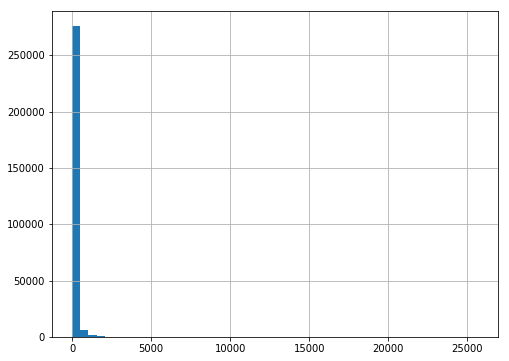

In [23]:
df['Amount'].hist(bins=50,figsize=(8,6))

In [3]:
#rozkład amount dla fraudów


In [1]:
#kwota poniżej progu

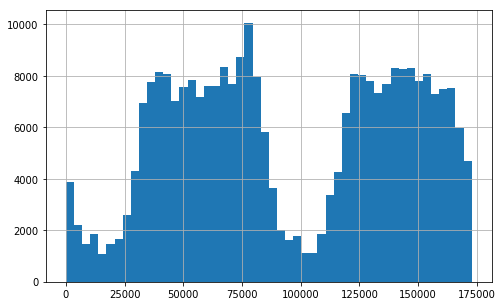

In [26]:
df['Time'].hist(bins=50,figsize=(8,5))

In [27]:
60*60*24

86400

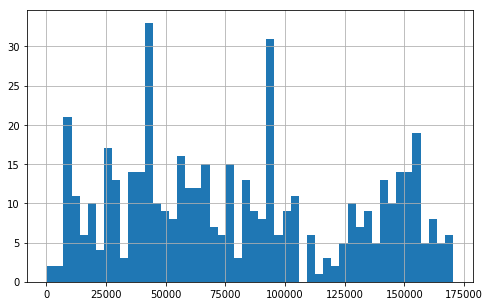

In [28]:
df[df['Class']==1]['Time'].hist(bins=50,figsize=(8,5))

In [29]:
corr_matrix = df.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [22]:
#subsample 
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:fraud_df.shape[0]]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=2019)
new_df.shape

(984, 31)

In [23]:
corr_matrix = new_df.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V4        0.701986
V11       0.689825
V2        0.497574
V19       0.269161
V20       0.185109
V21       0.129078
V27       0.096508
Amount    0.068382
V25       0.062334
V8        0.060974
V28       0.060277
V26       0.052315
V22      -0.000449
V15      -0.035600
V23      -0.036742
V13      -0.056888
V24      -0.075152
Time     -0.188487
V5       -0.374846
V6       -0.408261
V1       -0.435405
V18      -0.474017
V7       -0.480229
V17      -0.559571
V9       -0.565271
V3       -0.570837
V16      -0.599341
V10      -0.624903
V12      -0.682214
V14      -0.744860
Name: Class, dtype: float64

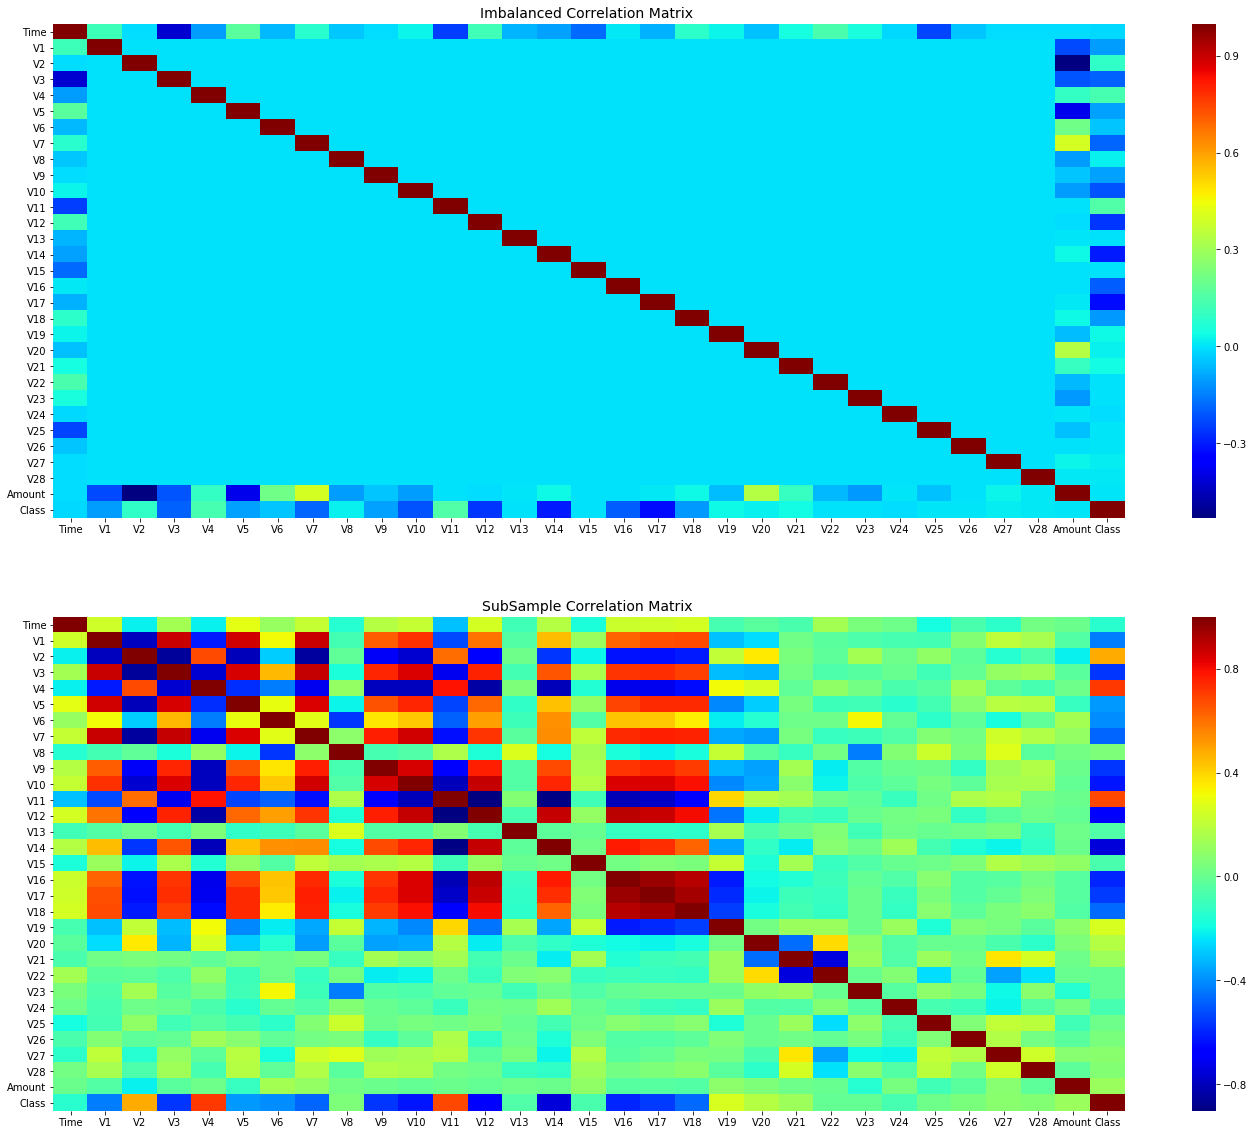

In [10]:
# conda install -c anaconda seaborn 

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8))

#full data set
corr = df.corr()
sns.heatmap(corr, cmap='jet', annot_kws={'size':14}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix ", fontsize=12)

#subsample
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='jet', annot_kws={'size':14}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=12)
plt.show()

#### Feature engineering

In [30]:

def feature_eng(df):
    
    df['Amount_scaled'] = 
    df['Amount_1']=
    df['Amount_100']=
    df['Day']=df['Time'].apply(lambda x: 1 if x<=86400 else 2)
    df['Day_time']=df['Time'].apply(lambda x: x if x<=86400 else x-86400)
    
    return df

In [31]:
df=feature_eng(df)
print(df.shape)

(284807, 36)


#### Cross validation

In [32]:
from sklearn.base import clone

def my_cv (m, x, y):
    
    cv = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)  
    
    scores_r = []
    scores_p = []
    scores_f = []
    
    for train_idx, test_idx in cv.split(x,y): 
        
        model=clone(m)
        model.fit(x.loc[train_idx], y[train_idx])
        y_pred = model.predict (x.loc[test_idx])  
        
        score1 = recall_score(y[test_idx], y_pred)
        score2 = precision_score(y[test_idx], y_pred)
        score3 = f1_score(y[test_idx], y_pred)
        
        scores_r.append(score1)
        scores_p.append(score2)
        scores_f.append(score3) 
        
    return round(np.mean(scores_r),3), round(np.mean(scores_p),3), round(np.mean(scores_f),3)

#### Podział danych

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

sp = 

for train_index, test_index in :
    train=
    test=
    
train=train.reset_index()
test=test.reset_index()

In [34]:
print('Percent of fraud in full data set: {}%'.format(round(df['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of fraud in train data set: {}%'.format(round(train['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of fraud in test data set: {}%'.format(round(test['Class'].value_counts(normalize=True)[1]*100,2)))

Percent of fraud in full data set: 0.17%
Percent of fraud in train data set: 0.17%
Percent of fraud in test data set: 0.17%


In [35]:
black_list=['Class','Amount','Time']
features=[x for x in df.columns if x not in black_list ]

X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

models=[RandomForestClassifier(random_state=2019),
        LogisticRegression(random_state=2019)]

for m in models:
    print(    )

RandomForestClassifier   (0.759, 0.946, 0.842)
LogisticRegression   (0.57, 0.853, 0.681)


### Krzywe uczenia

In [36]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.title(type(estimator).__name__)
    plt.legend(loc="best")
    return plt

#### Overfitting !!!

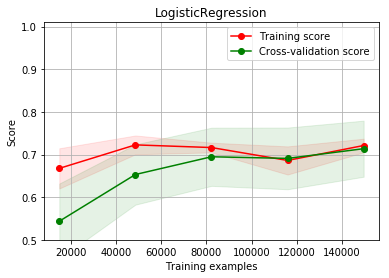

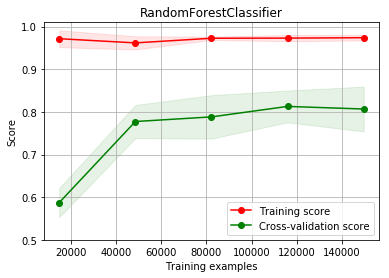

In [44]:
cv=StratifiedKFold(n_splits=4, random_state=2019, shuffle=True)

for m in [LogisticRegression(random_state=2019), RandomForestClassifier(random_state=2019)]:
    plot_learning_curve(m, X_cv, y_cv, ylim=(0.5, 1.01), cv=cv)

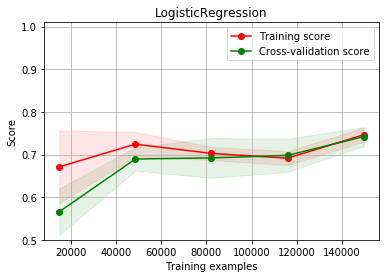

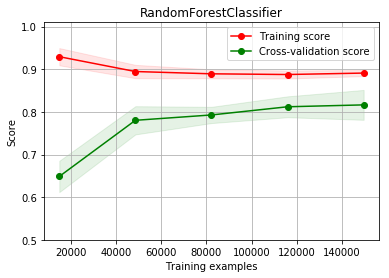

In [45]:
models=[LogisticRegression(solver='lbfgs', C=0.1, random_state=2019),
        RandomForestClassifier(max_depth=7, n_estimators=120, random_state=2019)]

cv=StratifiedKFold(n_splits=4, random_state=2019, shuffle=True)

for m in models:
    plot_learning_curve(m, X_cv, y_cv, ylim=(0.5, 1.01), cv=cv)

In [37]:
black_list=['Class','Amount','Time']
features=[x for x in df.columns if x not in black_list ]

X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

models=[RandomForestClassifier(max_depth=7, n_estimators=120, random_state=2019),
        LogisticRegression(solver='lbfgs', C=0.1, random_state=2019)]

for m in models:
    print(type(m).__name__,' ',my_cv(m,X_cv,y_cv))

RandomForestClassifier   (0.753, 0.927, 0.83)
LogisticRegression   (0.645, 0.812, 0.716)


In [38]:
def validation(model, df_train=None, df_test=None,  matrix=True):
    
    black_list=['Class','Amount','Time']
    features=[x for x in df.columns if x not in black_list ]   
    X = df_train.loc[:,features].values 
    y = df_train['Class'].values
 
    X_test = df_test.loc[:,features].values
    y_test = df_test['Class'].values
    
    print(type(model).__name__)
    
    model.fit(X,y)
    y_pred=model.predict(X_test)

    if matrix==True:
        print('confusion matrix','\n',confusion_matrix(y_test,y_pred))    
        
    rec=np.round(recall_score(y_test,y_pred),3)
    prec=np.round(precision_score(y_test,y_pred),3)
    f1=np.round(f1_score(y_test,y_pred),3)
    
    return rec, prec, f1   

In [39]:
for m in models:
    print('(rec, prec, f1)', )

RandomForestClassifier
confusion matrix 
 [[85289     6]
 [   37   111]]
(rec, prec, f1) (0.75, 0.949, 0.838) 

LogisticRegression
confusion matrix 
 [[85269    26]
 [   42   106]]
(rec, prec, f1) (0.716, 0.803, 0.757) 



### Precision recall curves

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    
    plt.plot(recalls, precisions, "b-", linewidth=2)
    
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    
    plt.axis([0, 1, 0, 1])

RandomForestClassifier


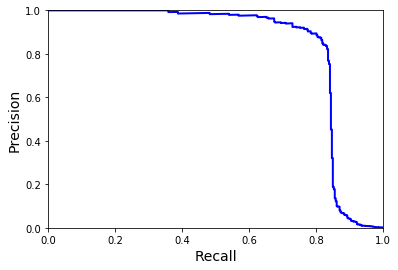

LogisticRegression


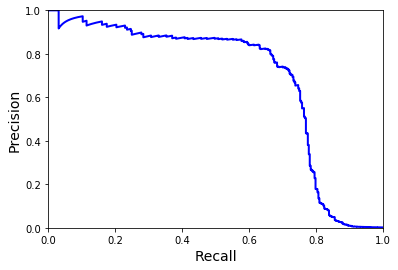

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict

for m in models:
    y_predict=
    y_pred=
    
    precisions, recalls, thresholds =   
    
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    
    #plot precision recall
    
    plt.show()

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    plt.xlabel("Threshold", fontsize=12)
    plt.legend(loc="down right", fontsize=10)

RandomForestClassifier


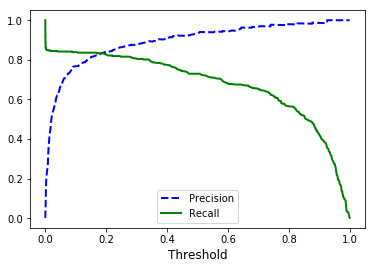

LogisticRegression


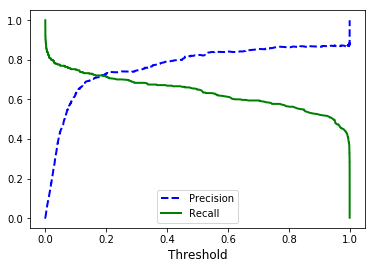

In [52]:
for m in models:
    y_predict = cross_val_predict(m, X_cv, y_cv, cv=5, method='predict_proba')
    y_pred = y_predict[:,-1]
    
    precisions, recalls, thresholds = precision_recall_curve(y_cv, y_pred)  
    
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()

In [53]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric:  0.7708333333333334
Recall metric:  0.7430555555555556
Recall metric:  0.7291666666666666
Recall metric:  0.7083333333333334
Recall metric:  0.6875
Recall metric:  0.6597222222222222
Recall metric:  0.6458333333333334
Recall metric:  0.6319444444444444
Recall metric:  0.6180555555555556


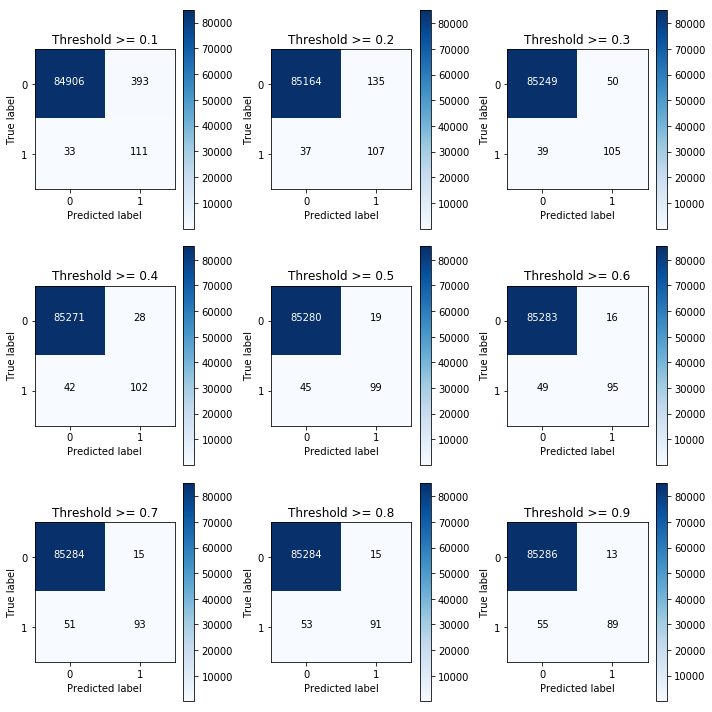

In [54]:
black_list=['Class','Amount']
features=[x for x in df.columns if x not in black_list ]   
X = train.loc[:,features].values 
y = train['Class'].values
 
X_test = test.loc[:,features].values
y_test = test['Class'].values

lr = LogisticRegression(solver='lbfgs',C=0.1,random_state=2019)
lr.fit(X,y)
y_pred_proba = lr.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_recall = y_pred_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1  
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_recall)
    np.set_printoptions(precision=2)

    print("Recall metric: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 

## Undersampling

![title](img/u.png)

1. Ustal liczbę fraudów 
2. Podziel na fraudy i nie-fraudy
3. Wybierz tyle obserwacji normalnych ile mamy fraudów
4. Połącz dwa zbiory indeksów

In [41]:
print('Percent of fraud in undersampled set: {}%'.format(round(und_df['Class'].value_counts(normalize=True)[1]*100,2)))
print('Number of fraud in undersampled set: {}'.format(und_df['Class'].value_counts(normalize=False)[1]))
print('Number of non fraud in undersampled set: {}'.format(und_df['Class'].value_counts(normalize=False)[0]))

Percent of fraud in undersampled set: 50.0%
Number of fraud in undersampled set: 344
Number of non fraud in undersampled set: 344


In [42]:
black_list=['Class','Time','Amount']
features=[x for x in und_df.columns if x not in black_list ]
X = und_df.loc[:,features].values 
y = und_df['Class'].values

models=[LogisticRegression(random_state=2019),
        RandomForestClassifier(random_state=2019)]

print('     Model      (accuracy, recall, precision, f1)  ')
for m in models:
    print(type(m).__name__,train_and_predict(m, X, y, test_size=0.3))

     Model      (accuracy, recall, precision, f1)  
LogisticRegression (0.952, 0.957, 0.938, 0.947)
RandomForestClassifier (0.961, 0.936, 0.978, 0.957)


In [43]:
def undersampling(xc, yc):  
    
    number_fraud = len(xc[yc==1]) 
    
    fraud_idx = xc[yc==1].index
    normal_idx = xc[yc==0].index 
    
    np.random.seed(2019)
    normal_idx_random = np.random.choice(normal_idx,number_fraud,replace=False)
    
    und_idx = np.concatenate([fraud_idx,normal_idx_random])
    np.random.shuffle(und_idx)  
    
    return xc.loc[und_idx], yc[und_idx]

In [44]:
def cv_undersampling (m, xc, yc):
    
    cv = StratifiedKFold(n_splits=5, random_state=2019, shuffle=True)    
    scores_r = []
    scores_p = []
    
    for train_idx, test_idx in cv.split(xc,yc):      
        x_tr=xc.loc[train_idx]
        y_tr=yc.loc[train_idx]
        x_t=xc.loc[test_idx]
        y_t=yc.loc[test_idx]
        
        x, y =     
        model = clone(m)
        
        y_pred =
        
        score_r = recall_score(y_t, y_pred)
        score_p = precision_score(y_t, y_pred)    
        scores_r.append(score_r)
        scores_p.append(score_p)   
        
    return (round(np.mean(scores_r),3)),(round(np.mean(scores_p),3))

In [45]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]
X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

for m in [RandomForestClassifier(max_depth=9, n_estimators=110, random_state=2019),
          LogisticRegression(C=0.1,random_state=2019)]:
    print(type(m).__name__,'(recall, precision)',cv_undersampling(m, X_cv, y_cv),)

RandomForestClassifier (recall, precision) (0.895, 0.064)
LogisticRegression (recall, precision) (0.901, 0.047)


In [46]:
for m in [RandomForestClassifier(max_depth=7, n_estimators=110, random_state=2019),
          LogisticRegression(C=0.1, random_state=2019)]:
    print('(rec,prec,f1)',validation(m, und_df, test),'\n')

RandomForestClassifier
confusion matrix 
 [[84301   994]
 [   19   129]]
(rec,prec,f1) (0.872, 0.115, 0.203) 

LogisticRegression
confusion matrix 
 [[83097  2198]
 [   15   133]]
(rec,prec,f1) (0.899, 0.057, 0.107) 



## Oversampling

![title](img/o.png)

###  SMOTE

In [2]:
# conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTE

![title](img/s.png)

In [48]:
Xs = train.loc[:,features].values 
ys = train['Class'].values

smote = 
X_resampled, y_resampled = 

In [49]:
train_overs = pd.DataFrame(data=np.concatenate([X_resampled, y_resampled.reshape(-1,1)], axis=1), columns=features+['Class'])

print('Number of fraud in undersampled set: {}'.format(len(X_resampled[y_resampled==1])))
print('Number of non fraud in undersampled set: {}'.format(len(X_resampled[y_resampled==0])))

Number of fraud in undersampled set: 199020
Number of non fraud in undersampled set: 199020


In [50]:
def my_cv_os (m, xc, yc):
    
    cv = StratifiedKFold(n_splits=5, random_state=2019, shuffle=True) 
    scores_r = []
    scores_p = []
    
    for train_idx, test_idx in cv.split(xc,yc):        
        x_tr=xc.loc[train_idx]
        y_tr=yc.loc[train_idx]
        x_t=xc.loc[test_idx]
        y_t=yc.loc[test_idx]
        
        method =
        X_resampled, y_resampled = 
        model=
        
        y_pred =         
        
        score1 = recall_score(y_t, y_pred)
        score2 = precision_score(y_t, y_pred)       
        scores_r.append(score1)
        scores_p.append(score2)   
        
    return (round(np.mean(scores_r),3),round(np.mean(scores_p),3))

In [51]:
models=[RandomForestClassifier(max_depth=7,n_estimators=120,random_state=2019),
        LogisticRegression(solver='lbfgs',C=0.1,random_state=2019)]

In [52]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]

X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

for m in models:
    print(type(m).__name__,' (recall, precision) ', my_cv_os(m, X_cv, y_cv))

RandomForestClassifier  (recall, precision)  (0.869, 0.351)
LogisticRegression  (recall, precision)  (0.892, 0.076)


In [53]:
for m in models:
    print('(rec, prec, f1)',validation(m, train_overs, test),'\n')

RandomForestClassifier
confusion matrix 
 [[85036   259]
 [   21   127]]
(rec, prec, f1) (0.858, 0.329, 0.476) 

LogisticRegression
confusion matrix 
 [[83375  1920]
 [   19   129]]
(rec, prec, f1) (0.872, 0.063, 0.117) 



 ### Podsumowanie 

![title](img/summary.png)